<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [102]:
df = pd.read_csv('../data/states_edu.csv') #1715*25
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [103]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

#I want all data should not be nan for average math score for 8th grdae
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True) 


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

Math for 8th grade

**(hit `Enter` to edit)**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [104]:
num_diff_years = len(pd.unique(df['YEAR']))
print("There are", num_diff_years, "number of different years in our dataset.")

There are 13 number of different years in our dataset.


Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [105]:
mich = df.loc[df['STATE'] == "MICHIGAN"]
ohio = df.loc[df['STATE'] == "OHIO"]
avg_mich = mich['AVG_MATH_8_SCORE'].mean()
avg_ohio = ohio['AVG_MATH_8_SCORE'].mean()

print(avg_mich, avg_ohio)
print("Ohio has the higher average math score for 8th grade across all years")


276.1666666666667 282.25
Ohio has the higher average math score for 8th grade across all years


Find the average for your pedictor score across all states in 2019

In [106]:
# df['AVG_MATH_8_SCORE']
year_2019 = df.loc[df['YEAR'] == 2019 ]
AVG_MATH_8_SCORE_2019 = year_2019['AVG_MATH_8_SCORE'].mean()
print("The average score of Math for 8th grade across all states in 2019 is", AVG_MATH_8_SCORE_2019)


The average score of Math for 8th grade across all states in 2019 is 281.2641509433962


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [107]:
df.groupby("STATE").max()['AVG_MATH_8_SCORE']

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [108]:
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']
df['REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL_ALL']

drop_column_list = ['TOTAL_EXPENDITURE', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']
df = df.drop(drop_column_list, axis = 1)
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'ENROLL_PREK',
       'ENROLL_KINDER', 'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY',
       'ENROLL_HS', 'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'EXPENDITURE_PER_STUDENT',
       'REVENUE_PER_STUDENT'],
      dtype='object')

Final feature list: **['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'TOTAL_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER', 'ENROLL_4',
       'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS', 'ENROLL_ALL',
       'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE',
       'AVG_READING_8_SCORE', 'EXPENDITURE_PER_STUDENT',
       'REVENUE_PER_STUDENT']**

Feature selection justification: **Since we have created 'EXPENDITURE_PER_STUDENT' from two features, the combineded feature contains essential information from two columns. So, we don't need features such as'TOTAL_EXPENDITURE' Similarly with revenue, I have created feature REVENUE_PER_STUDENT. Furethermore, I have erased all the minor information specific to expenditures and revenues since I want to only focuse on EXPENDITURE_PER_STUDENT and REVENUE_PER_STUDENT in terms of my predictor**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0.5, 1.0, 'Distribution of 8th grade reading scores')

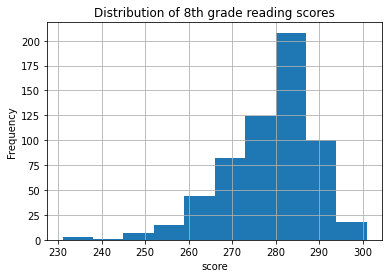

In [109]:
df.AVG_MATH_8_SCORE.hist()
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of 8th grade reading scores')

**<CAPTION FOR VIZ 1>**

**Visualization 2**

<AxesSubplot:xlabel='EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_8_SCORE'>

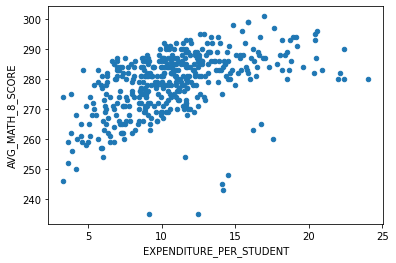

In [110]:
df.plot.scatter(x="EXPENDITURE_PER_STUDENT", y = "AVG_MATH_8_SCORE")

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X = df[['REVENUE_PER_STUDENT','ENROLL_8','EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **REGRESSION**

In [114]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [115]:
# create your model here
model = LinearRegression()

In [116]:
model.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred = model.predict(X_test)

In [118]:
# # FOR CLASSIFICATION ONLY:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(model, X_test, y_test,
#                          cmap=plt.cm.Blues)

model.score(X_test, y_test)
np.mean((model.predict(X_test)-y_test)**2)**0.5

9.354800583853033

Text(0, 0.5, 'AVG_MATH_8_SCORE')

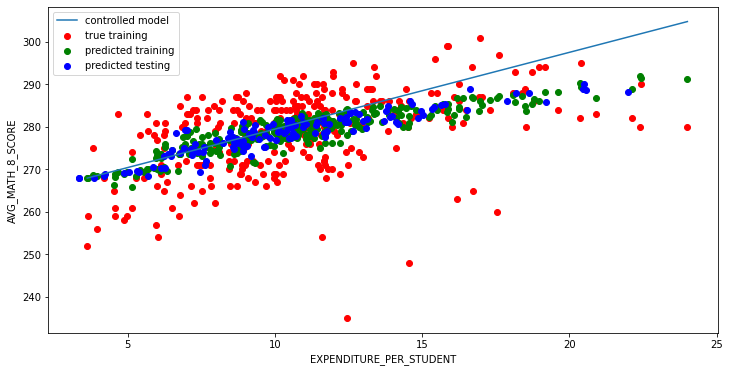

In [119]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.
col_name = 'EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')

<h2> Summary </h2>

**For check point2, I want to figure out the underlyting relationship between the avgerage score of 8th grade students and appropriate features in the data. I found out that regression is an appropriate method to learn the relationship. I chose 'TOTAL_REVENUE_PER_STUDENT', 'ENROLL_8', 'YEAR', and 'EXPENDITURE_PER_STUDENT' to be the input features that would be the intereseting predictors. From the plot at the end and the root mean squared error value, we could estimate that the model have 